In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [4]:
df = pd.read_csv('data.csv', parse_dates=['date'])
print(df.shape)
df.head()

(2340, 7)


C:\Users\admin\AppData\Local\Temp\ipykernel_1436\2070614217.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('data.csv', parse_dates=['date'])


,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1


In [5]:
tag_df = pd.read_csv('data.csv')
print(tag_df.shape)
tag_df.head()

(2340, 7)


,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,19-07-2019 14:40,1,type1
1,cash-in,30105,8692,494528,17-05-2019 14:57,1,type1
2,cash-in,30105,60094,494528,20-07-2019 13:20,1,type1
3,cash-in,30105,20575,494528,03-07-2019 14:15,1,type1
4,cash-in,30105,45938,494528,26-05-2019 10:40,1,type1


In [6]:
# final_df = df.merge(tag_df, 'inner', left_on='destinationid', right_on='guiltyid').info()

In [7]:
df.isnull().sum().sum()

0

There are no null values in the dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   typeofaction   2340 non-null   object        
 1   sourceid       2340 non-null   int64         
 2   destinationid  2340 non-null   int64         
 3   amountofmoney  2340 non-null   int64         
 4   date           2340 non-null   datetime64[ns]
 5   isfraud        2340 non-null   int64         
 6   typeoffraud    2340 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 128.1+ KB


In [9]:
df.nunique()

typeofaction        2
sourceid         1749
destinationid    1710
amountofmoney     933
date             2309
isfraud             2
typeoffraud         4
dtype: int64

In [10]:
target = 'isfraud'
cat_cols = df.drop(columns=[target]).select_dtypes('object').columns.to_list()
num_cols = df.drop(columns=[target]).select_dtypes(['float', 'int']).columns.to_list()
date_col = 'date'

len(cat_cols), len(num_cols)

(2, 3)

In [11]:
df.duplicated().sum()

0

In [12]:
df.drop(columns=['sourceid', 'destinationid']).duplicated().sum()

0

## Encode the categorical columns

In [13]:
for col in cat_cols:
    print(f'{col}:  {df[col].unique().tolist()}')

typeofaction:  ['cash-in', 'transfer']
typeoffraud:  ['type1', 'type2', 'type3', 'none']


In [14]:
df['typeofaction'] = df['typeofaction'].map({'cash-in': 0, 'transfer': 1})
df['typeoffraud'] = df['typeoffraud'].map({'type1': 1, 'type2': 2, 'type3': 3, 'none': 0})

In [15]:
for col in ['typeofaction', 'typeoffraud']:
    print(f'{col}:  {df[col].unique().tolist()}')

typeofaction:  [0, 1]
typeoffraud:  [1, 2, 3, 0]


In [16]:
# Now move all cat_cols value to num_cols
num_cols.extend(cat_cols)
num_cols

['sourceid', 'destinationid', 'amountofmoney', 'typeofaction', 'typeoffraud']

### Work with `date`

In [17]:
date_indexed_df = df.set_index('date')

## Vizualization

### Numerical Columns

In [18]:
def plot_num_cols(
    df: pd.DataFrame,
    num_cols: list[str],
    kind,
    subplots: tuple[int, int] = (2, 3),
    title: str | None = None,
    figsize: tuple[int, int] = (10, 6),
    savefig_path: str | None = None,
):
    fig, axes = plt.subplots(*subplots, figsize=figsize)

    if title:
        fig.suptitle(title)

    for ax, col in zip(axes.ravel(), num_cols):
        df[col].plot(kind=kind, ax=ax, title=col)

    plt.tight_layout()
    if savefig_path:
        plt.savefig(savefig_path)

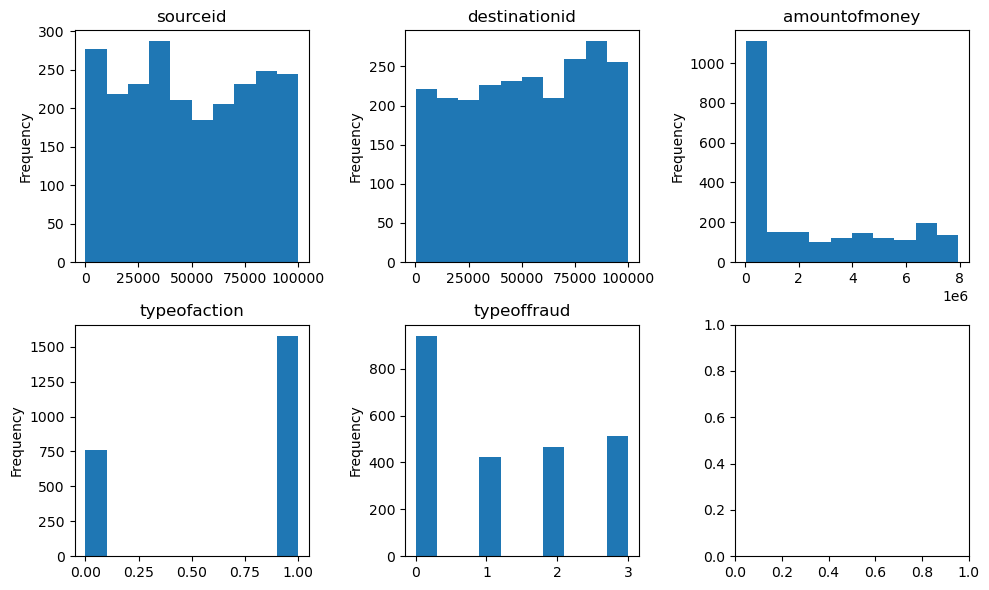

In [19]:
plot_num_cols(df, num_cols, 'hist')

In [20]:
df[num_cols].skew()

sourceid         0.042332
destinationid   -0.100452
amountofmoney    0.744457
typeofaction    -0.748785
typeoffraud      0.317553
dtype: float64

Here, `amountofmoney` is **highly positve skewed** with `0.744`.  
Also, a categorical column `typeofaction` is **highly negative skewed** with `-0.748`.

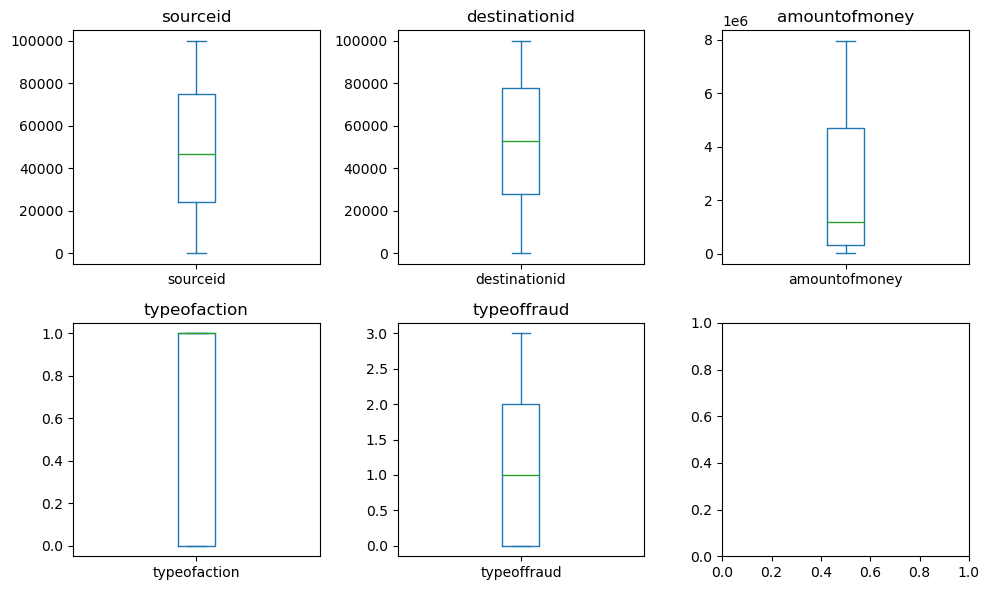

In [21]:
plot_num_cols(df, num_cols, 'box')

### Categorical Columns

In [22]:
def plot_cat_cols(
    df: pd.DataFrame,
    cat_cols: list[str],
    kind,
    subplots: tuple[int, int] = (1, 2),
    title: str | None = None,
    figsize = (10, 6),
    savefig_path: str | None = None,
):
    fig, axes = plt.subplots(*subplots, figsize=figsize)

    if title:
        fig.suptitle(title)

    plt.tight_layout()

    for ax, col in zip(axes.ravel(), cat_cols):
        df[col].value_counts().sort_index().plot(kind=kind, ax=ax)

    if savefig_path:
        plt.savefig(savefig_path)

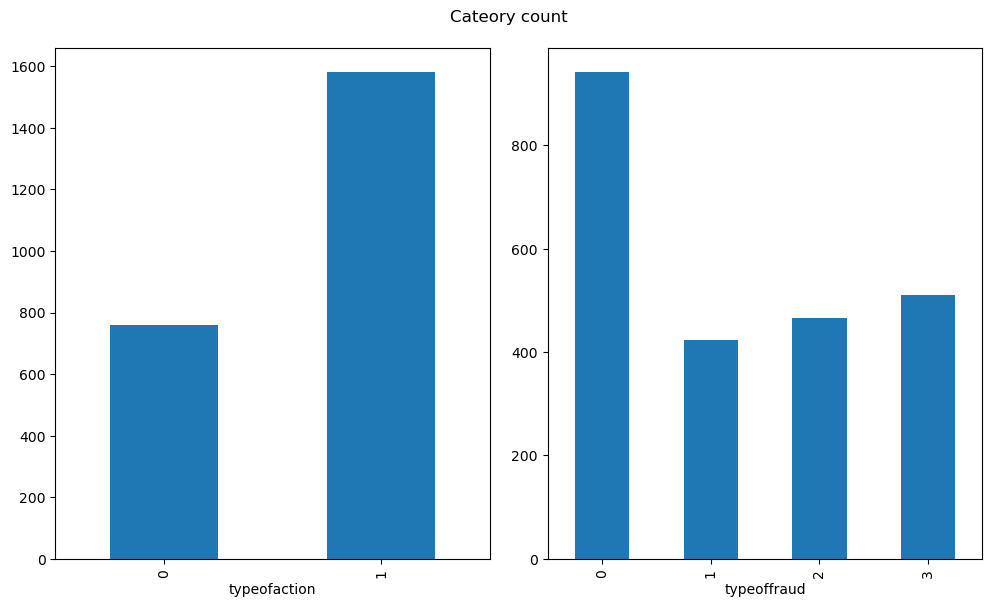

In [23]:
plot_cat_cols(df, cat_cols, 'bar', title='Cateory count')

### Multi Plots

<Axes: >

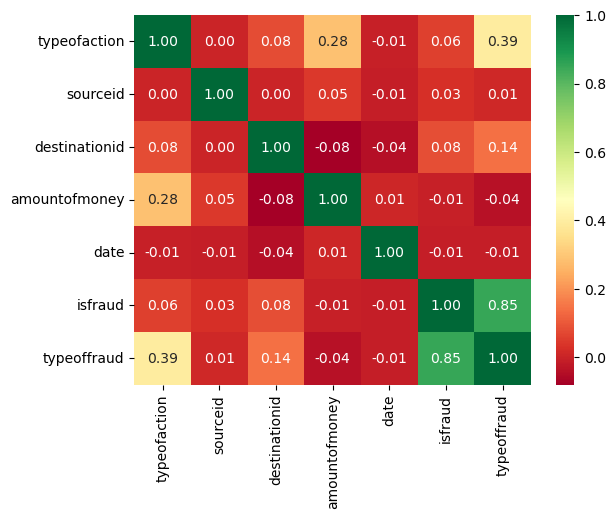

In [24]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdYlGn', cbar=True)

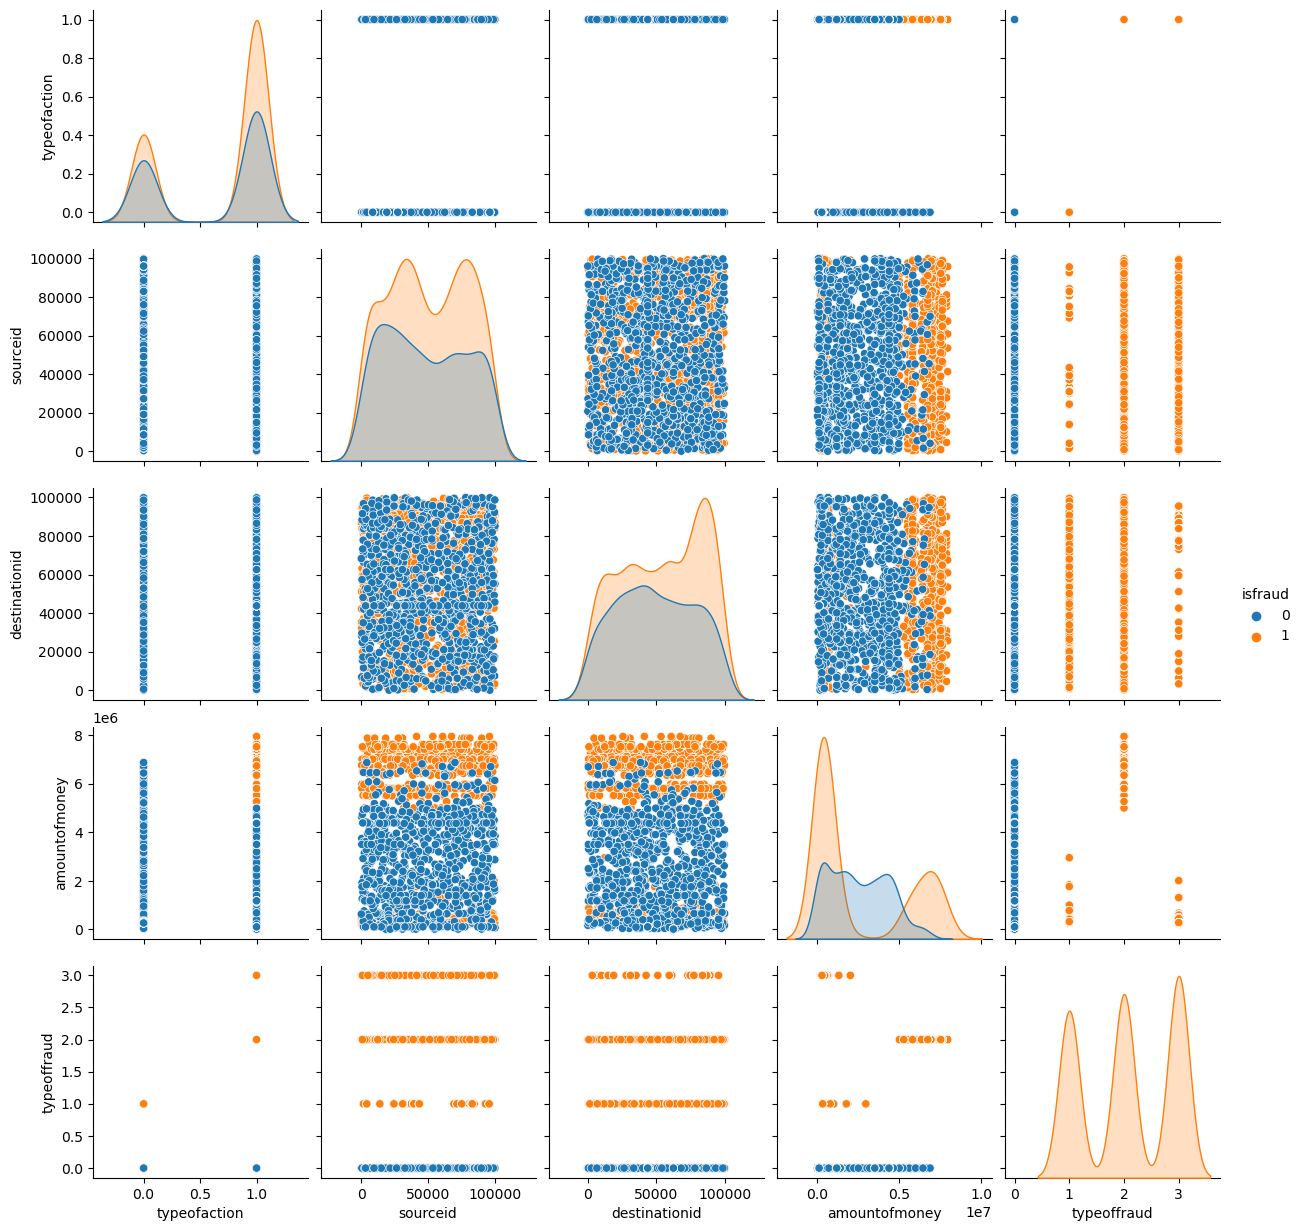

In [25]:
sns.pairplot(df.drop(columns=[date_col]), hue=target)

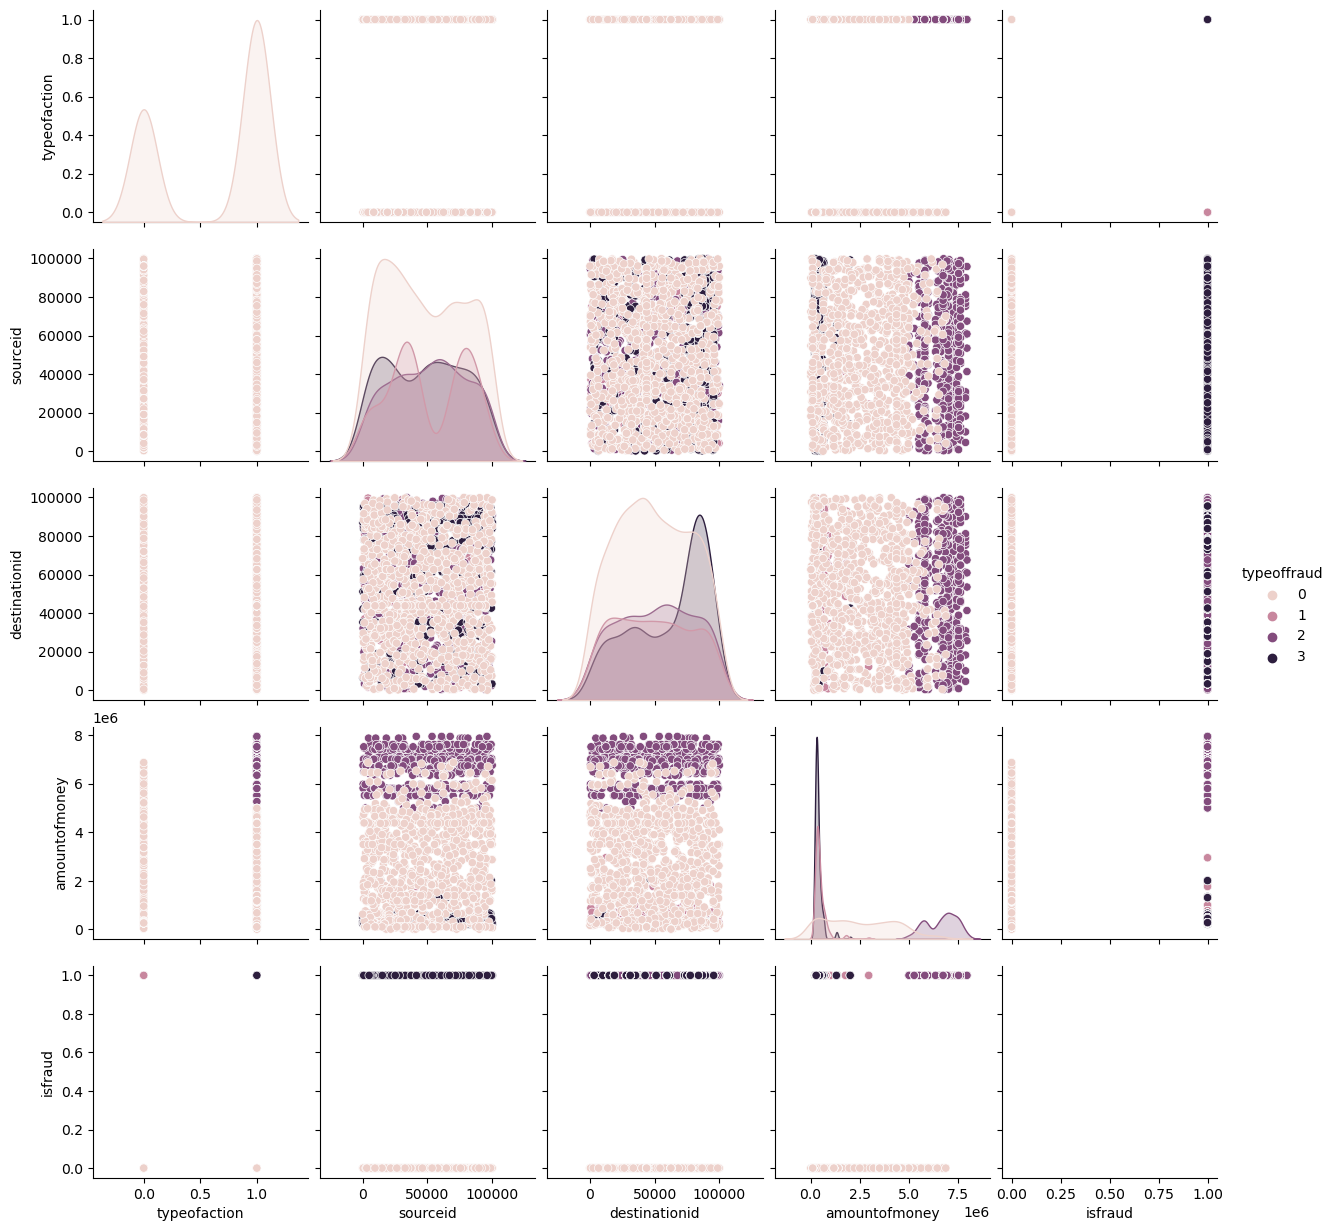

In [26]:
sns.pairplot(df.drop(columns=[date_col]), hue='typeoffraud')

## ---

In [33]:
df['date'] = pd.to_datetime(df['date'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   typeofaction     2340 non-null   int64         
 1   sourceid         2340 non-null   int64         
 2   destinationid    2340 non-null   int64         
 3   amountofmoney    2340 non-null   int64         
 4   date             2340 non-null   datetime64[ns]
 5   isfraud          2340 non-null   int64         
 6   typeoffraud      2340 non-null   int64         
 7   date_month_name  2340 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 146.4+ KB


In [35]:
df['date_month_name'] = df['date'].dt.month_name()

df.head()


,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud,date_month_name
0,0,30105,28942,494528,2019-07-19 14:40:00,1,1,July
1,0,30105,8692,494528,2019-05-17 14:57:00,1,1,May
2,0,30105,60094,494528,2019-07-20 13:20:00,1,1,July
3,0,30105,20575,494528,2019-07-03 14:15:00,1,1,July
4,0,30105,45938,494528,2019-05-26 10:40:00,1,1,May


In [36]:
df.drop('date', axis=1, inplace=True)

In [37]:
df.head()

,typeofaction,sourceid,destinationid,amountofmoney,isfraud,typeoffraud,date_month_name
0,0,30105,28942,494528,1,1,July
1,0,30105,8692,494528,1,1,May
2,0,30105,60094,494528,1,1,July
3,0,30105,20575,494528,1,1,July
4,0,30105,45938,494528,1,1,May


In [38]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['isfraud']=encoder.fit_transform(df['isfraud'])

In [39]:
df['isfraud'].value_counts()

isfraud
1    1399
0     941
Name: count, dtype: int64

In [40]:
## independent and depemndent features
X=df.drop(labels=['isfraud'],axis=1)
y=df['isfraud']

In [41]:
X.head()

,typeofaction,sourceid,destinationid,amountofmoney,typeoffraud,date_month_name
0,0,30105,28942,494528,1,July
1,0,30105,8692,494528,1,May
2,0,30105,60094,494528,1,July
3,0,30105,20575,494528,1,July
4,0,30105,45938,494528,1,May


In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [43]:
X_train.head()

,typeofaction,sourceid,destinationid,amountofmoney,typeoffraud,date_month_name
787,1,33473,32740,7422956,2,April
1503,0,45772,24950,131219,0,June
1187,1,78804,86903,215499,3,May
679,1,25531,37485,7012527,2,May
65,0,1615,72623,639229,1,July


In [51]:
from sklearn.impute import SimpleImputer##handling missing values
from sklearn.preprocessing import OneHotEncoder## handling categorical values
from sklearn.preprocessing import StandardScaler## fetaure scaling
from sklearn.pipeline import Pipeline
from sklearn.compose import  ColumnTransformer
##automating the entire

In [57]:
categorical_cols=['typeofaction','typeoffraud','date_month_name']
numerical_cols=['sourceid', 'destinationid', 'amountofmoney']

In [58]:
## feature engineering automation
num_pipeline=Pipeline(
    steps=[
         ('imputer',SimpleImputer(strategy='median')), ## missing values
         ('scaler', StandardScaler()) ## feature scaling
    
    ]
)

## for categorical pipeline
cat_pipeline=Pipeline(
    steps=[
         ('imputer',SimpleImputer(strategy='most_frequent')), ## missing values
         ('onehotencoder', OneHotEncoder()) ## categorical features to numerical
     
    ]
)

In [59]:
preprocessor=ColumnTransformer([
    ('num_pipeline', num_pipeline,numerical_cols),
    ('cat_pipeline', cat_pipeline,categorical_cols)
])

In [60]:
X_train.head()

,typeofaction,sourceid,destinationid,amountofmoney,typeoffraud,date_month_name
787,1,33473,32740,7422956,2,April
1503,0,45772,24950,131219,0,June
1187,1,78804,86903,215499,3,May
679,1,25531,37485,7012527,2,May
65,0,1615,72623,639229,1,July


In [61]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier



In [63]:
## automate Model training proess
models={   
    'Random Forest':RandomForestClassifier(),
    'Support Vector Machine':SVC(),
    'Naive Bayes':GaussianNB(),
    'KNN':KNeighborsClassifier()


}

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
def evaluate_model(X_train,y_train,X_test,y_test,models):
    
    report = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        # Train model
        model.fit(X_train,y_train)

            

        # Predict Testing data
        y_test_pred =model.predict(X_test)

        # Get accuracy for test data prediction
       
        test_model_score = accuracy_score(y_test,y_test_pred)

        report[list(models.keys())[i]] =  test_model_score
            

            
    return report

In [66]:
evaluate_model(X_train,y_train,X_test,y_test,models)

{'Random Forest': 1.0,
 'Support Vector Machine': 1.0,
 'Naive Bayes': 1.0,
 'KNN': 1.0}